## Validation of Cooling Lib
This notebook will build the multi-layer structure described in Raman $et$ $al.$, Nature 515, 540-546 (2014), compute plot its emissivity in the solar region and in the atmospheric transmissivity region of the spectrum (~300-2500 nm for the former, 2500-20000 nm for the latter), and compute the cooling power for several different differences between the temperature of the structure and the ambient temperature.  


 Temperature not specified!
 Proceeding with default T = 300 K
69.70430047224701  W/m^2 (Total Cooling Power)
129.20918487262873  W/m^2 ((Cooling) Power radiated by structure at  300 K)
18.268834884651078  W/m^2 ((Warming) Power absorbed from sun)
41.23604951573062  W/m^2 ((Warming) Power absorbed from atmospheric radiation at  300 K)


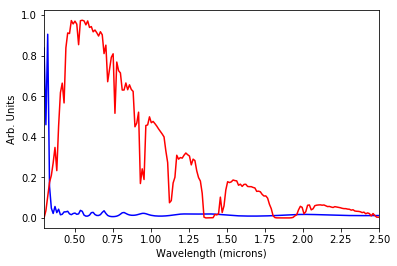

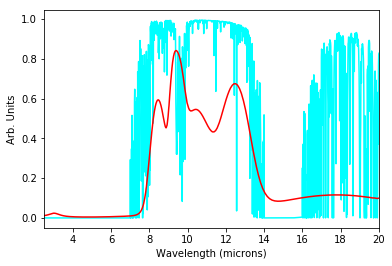

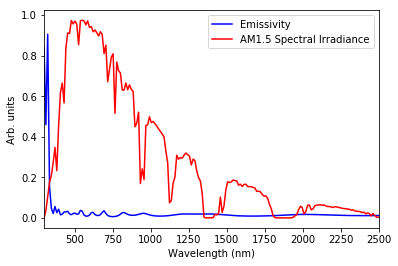

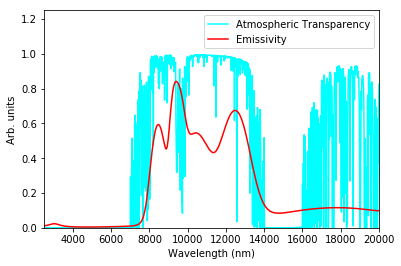

In [2]:
### Import WPTHERML class!
from wptherml.wpml import multilayer
from matplotlib import pyplot as plt
from wptherml.datalib import datalib

### Define structure!
structure = {

        'Material_List': ['Air', 'SiO2', 'HfO2', 'SiO2', 'HfO2', 'SiO2', 'HfO2', 'SiO2', 'Ag', 'Air'],
        'Thickness_List': [0, 230e-9, 485e-9, 688e-9, 13e-9, 73e-9, 34e-9, 54e-9, 200e-9, 0],
        'Lambda_List': [300e-9, 60000e-9, 5000],
        'EXPLICIT_ANGLE': 1,
        'COOLING': 1
     
        }

### create instance of multilayer class called cool_ml
cool_ml = multilayer(structure)

### get AM1.5 spectra and atmospheric transmissivity data from datalib
AM = datalib.AM(cool_ml.lambda_array)
T_atm = datalib.ATData(cool_ml.lambda_array)

### plot emissivity of cool_ml against AM1.5 spectrum in the visible range
### to demonstrate the high solar reflectivity of cool_ml
plt.plot(cool_ml.lambda_array*1e9, cool_ml.emissivity_array, 'blue', label='Emissivity')
plt.plot(cool_ml.lambda_array*1e9, AM/(1.4*1e9), 'red', label='AM1.5 Spectral Irradiance')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Arb. units")
plt.legend(loc = 'best')
plt.xlim(300,2500)
plt.show()

### plot the emissivity of cool_ml against the atmospheric transmissivity in the IR
### to demonstrate the selective thermal emissivity of cool_ml
plt.plot(cool_ml.lambda_array*1e9, T_atm, 'cyan', label='Atmospheric Transparency')
plt.plot(cool_ml.lambda_array*1e9, cool_ml.emissivity_array, 'red', label='Emissivity')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Arb. units")
plt.legend(loc = 'best')
plt.xlim(2500,20000)
plt.ylim(0,1.25)
plt.show()


### Validate Power Radiated Against Stefan-Boltzmann law
Here we will force the cool_ml structure to be a perfect absorber/emitter across the visible and IR using the method *step_emissivity_ea(central_lambda, delta_lambda)* and then re-calling
the *cooling_power()* method, which will numerically integrate the thermal emission of cool_ml  over wavelength and angle at 300 K.  This shoudl in principle be the same as integrating a blackbody at 300 K, so should agree with the Stefan-Boltzmann law.  In practice, there will be numerical error from truncation of the wavelength range of cool_ml, and of finite sampling of angles of emission.

In [3]:

### now make structure a blackbody emitter at all angles
cool_ml.step_emissivity_ea(20000e-9,80000e-9)
### This is only normal emissivity in case you want to plot it!
cool_ml.step_emissivity(20000e-9,80000e-9)
### re-compute thermal emission spectra at each angle
cool_ml.thermal_emission_ea()
### re-compute cooling power
cool_ml.cooling_power()




sig = 5.670367e-8
### plot results assuming blackbody emissivity
print("Radiative Power (cooling) is ",cool_ml.radiative_power_val, "W/m^2")
print("Stefan-Boltzmann Law is ",cool_ml.T_ml**4*sig, "W/m^2")

Radiative Power (cooling) is  450.4891874450116 W/m^2
Stefan-Boltzmann Law is  459.29972699999996 W/m^2


The two results agree to 2 significant figures, which is reasonable considering the errors mentioned above, is reasonable to validate that our angular and wavelength integration performed within the cooling_power() method is functioning.  

We can also re-plot the quantities as before to visualize how the step_emissivity() method modifies the emissivity of cool_ml.

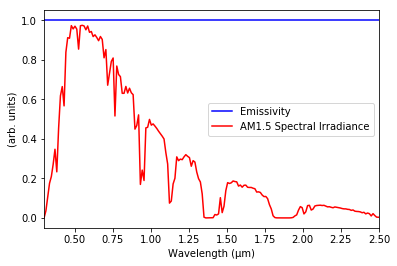

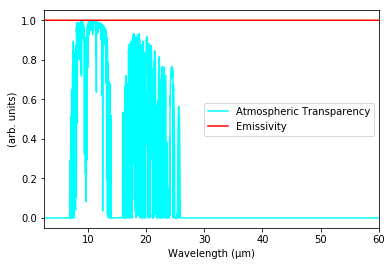

In [5]:
### get AM1.5 spectra and transmissivity data
AM = datalib.AM(cool_ml.lambda_array)
T_atm = datalib.ATData(cool_ml.lambda_array)
### plot results of perfect emissivity!
plt.plot(cool_ml.lambda_array*1e6, cool_ml.emissivity_array, 'blue', label='Emissivity')
plt.plot(cool_ml.lambda_array*1e6, AM/(1.4*1e9), 'red', label='AM1.5 Spectral Irradiance')
plt.xlabel("Wavelength (\u03BCm)")
plt.ylabel("(arb. units)")
plt.xlim(0.3,2.5)
plt.legend()
plt.show()


plt.plot(cool_ml.lambda_array*1e6, T_atm, 'cyan', label='Atmospheric Transparency')
plt.plot(cool_ml.lambda_array*1e6, cool_ml.emissivity_array, 'red', label='Emissivity')
#plt.plot(w_slab.lambda_array*1e6, BB, 'black')
plt.xlabel("Wavelength (\u03BCm)")
plt.ylabel("(arb. units)")
plt.xlim(2.5,60)
plt.legend()
plt.show()